In [3]:
#Importing necessary libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [4]:
#Importing and Reading the Iris dataset
df = pd.read_csv("/content/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
#Printing the shape of the Iris dataset
df.shape

(150, 6)

In [6]:
df.info

<bound method DataFrame.info of       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-seto

In [7]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
#Printing the columns of the dataset
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [9]:
#Checking for null values
null_values = df.isnull()
null_counts = null_values.sum()

print("Null Value Counts:")
print(null_counts)

Null Value Counts:
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [10]:
# Check for duplicate rows
duplicates = df.duplicated()
sum_duplicates = duplicates.sum()
print(f"Number of duplicate rows: {sum_duplicates}")

duplicate_rows = df[duplicates]
print("\nDuplicate Rows:")
print(duplicate_rows)

df.drop_duplicates(inplace=True)

Number of duplicate rows: 0

Duplicate Rows:
Empty DataFrame
Columns: [Id, SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm, Species]
Index: []


In [11]:
#Checking how many and what unique species are present in the data
num_unique_Species = df['Species'].nunique()
print(f"Number of unique values in 'Species': {num_unique_Species}")

unique_Species = df['Species'].unique()
print("\nUnique Species Values:")
for value in unique_Species:
    print(value)

Number of unique values in 'Species': 3

Unique Species Values:
Iris-setosa
Iris-versicolor
Iris-virginica


In [12]:
#Counting the number of each unique species
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

<Axes: title={'center': 'Species Distribution'}, ylabel='Species'>

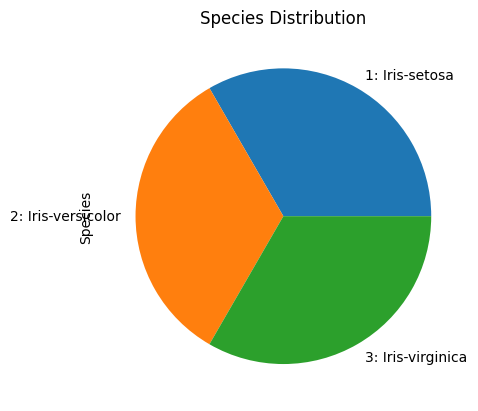

In [13]:
#Pie Chart to show the distribution of the 3 unique species
plt.title('Species Distribution')
df['Species'].value_counts().plot.pie(labels=['1: Iris-setosa','2: Iris-versicolor','3: Iris-virginica'])

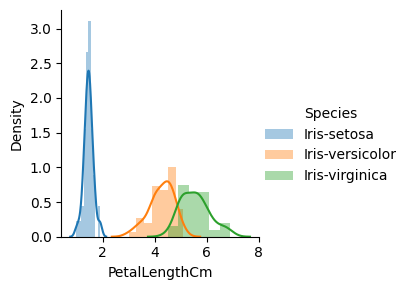

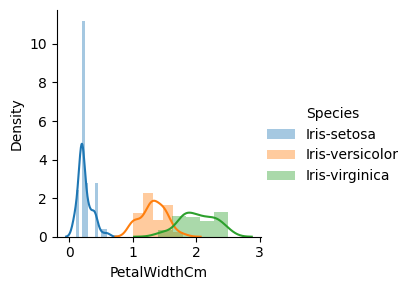

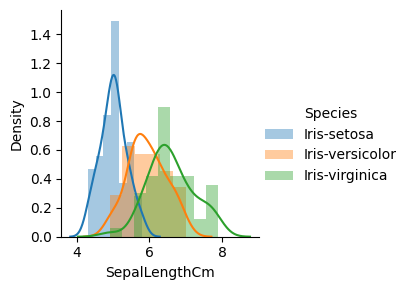

In [14]:
#Visualisations of the 3 species according to PetalLength, Petalwidth and SepalLength
iris_setosa = df.loc[df["Species"] == "Iris-setosa"]
iris_virginica = df.loc[df["Species"] == "Iris-virginica"]
iris_versicolor = df.loc[df["Species"] == "Iris-versicolor"]

sns.FacetGrid(df,hue="Species",height=3).map(sns.distplot,"PetalLengthCm").add_legend()
sns.FacetGrid(df,hue="Species",height=3).map(sns.distplot,"PetalWidthCm").add_legend()
sns.FacetGrid(df,hue="Species",height=3).map(sns.distplot,"SepalLengthCm").add_legend()

plt.show()

In [15]:
#Renaming the dataset as iris
iris=df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species']]

In [16]:
#Define input features (X) and target variable (y)
X = iris.iloc[:,:4].values
y = iris['Species'].values
iris.sample(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
95,5.7,3.0,4.2,1.2,Iris-versicolor
25,5.0,3.0,1.6,0.2,Iris-setosa
57,4.9,2.4,3.3,1.0,Iris-versicolor
35,5.0,3.2,1.2,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


NAIVE BAYES'

In [17]:
#Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state= 0)

In [18]:
#Scaling the input features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [19]:
#Creating a Gaussian Naive Bayes' classification model
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()

#Fitting the model on the training data
classifier.fit(X_train, y_train)

GaussianNB()

In [20]:
#Making predictions on the test set
y_pred = classifier.predict(X_test)
y_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa'], dtype='<U15')

In [21]:
#Evaluating the model to test accuracy
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test, y_pred)*100)
print("Confusion Matrix : ")
print()
cm

Accuracy :  95.65217391304348
Confusion Matrix : 



array([[ 7,  0,  0],
       [ 0, 11,  0],
       [ 0,  1,  4]])

DECISION TREE

In [22]:
#Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 30)

In [23]:
#Scaling the input features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [24]:
#Creating a Decision Tree classification model
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [25]:
treemodel = DecisionTreeClassifier()
treemodel.fit(X_train, y_train)

DecisionTreeClassifier()

Accuracy : 93.33333333333333
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.89      0.89      0.89         9
 Iris-virginica       0.89      0.89      0.89         9

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



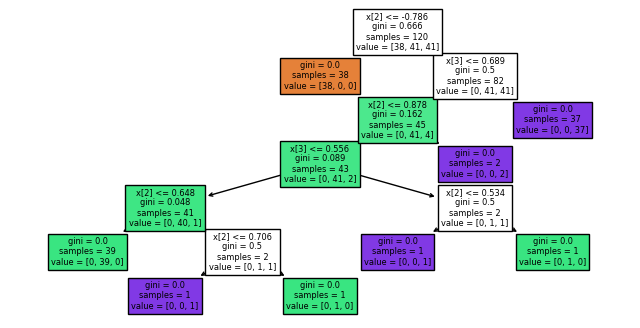

In [26]:
#Evaluating the model to test accuracy
from sklearn.metrics import accuracy_score, classification_report

plt.figure(figsize=(8,4))
tree.plot_tree(treemodel, filled=True)
y_pred = treemodel.predict(X_test)
score = accuracy_score(y_pred, y_test)
print('Accuracy :',score*100)
print(classification_report(y_pred, y_test))

RANDOM FOREST

In [27]:
#Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [28]:
#Scaling the input features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [29]:
#Creating a Random Forest classification model
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [30]:
#Make predictions on the testing data
y_pred = classifier.predict(X_test)

In [31]:
#Evaluating the model to test accuracy
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

score = accuracy_score(y_pred, y_test)
print('Accuracy :',score*100)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy : 96.66666666666667
[[10  0  0]
 [ 0 12  1]
 [ 0  0  7]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.88      1.00      0.93         7

       accuracy                           0.97        30
      macro avg       0.96      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



SVC

In [32]:
#Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 45)

In [33]:
#Scaling the input features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [34]:
# Creating a Support Vector Classifier model
from sklearn.svm import SVC
# Create an SVC classifier with modified hyperparameters
clf = SVC(C=10.0, kernel='rbf', gamma='scale')

In [35]:
# fitting x samples and y classes
clf.fit(X_train, y_train)

SVC(C=10.0)

In [36]:
# Make predictions on the testing data
y_pred_svc = clf.predict(X_test)

In [37]:
#Evaluating the model to test accuracy
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred_svc))
print(classification_report(y_test,y_pred_svc))
print(accuracy_score(y_test, y_pred_svc))

[[14  0  0]
 [ 0  9  0]
 [ 0  2 13]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.82      1.00      0.90         9
 Iris-virginica       1.00      0.87      0.93        15

       accuracy                           0.95        38
      macro avg       0.94      0.96      0.94        38
   weighted avg       0.96      0.95      0.95        38

0.9473684210526315
